In [2]:
from nariflow import start_initializer

In [3]:
start_initializer().initializer('tape')

In [4]:
from nariflow import Variable
from nariflow import optimizer
from nariflow import GradientTape
#from nariflow import calc_gradient
from nariflow import layer
from nariflow.models import Model
from nariflow import functions as f
from nariflow.core import elementary_function as ef
from nariflow.core import shape_function as sf
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import time

import os
import urllib

import datetime



In [137]:

def prepare():
    num_data = 100000
    dtype = np.float64

    x = np.linspace(0, 2 * np.pi, num_data)
    noise_range = (-0.05, 0.05)
    noise = np.random.uniform(noise_range[0], noise_range[1], size=x.shape)
    y = np.sin(x) + noise
    y = y.astype(dtype)
    data = y[:-1][:, np.newaxis]
    label = y[1:][:, np.newaxis]
    
    return data,label

In [138]:
class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = layer.RNN(hidden_size)
        self.l2 = layer.Linear(out_size, initializer_func='he_uniform')
        
    def forward(self, x):
        y = self.l1(x)
        y = self.l2(y)
        return y
    

In [139]:
train_set = prepare()

In [140]:
model = SimpleRNN(100, 1)

optimizers = optimizer.Adam(0.001)

optimizers.setup(model)

In [141]:
step = 10
mini_batch_size = 20

In [142]:
for i in range(mini_batch_size):
    if i == 0:
        mini_batch = np.expand_dims(train_set[0][i:][::mini_batch_size], axis = 1)
    else :
        mini_batch = np.hstack([mini_batch, 
                                np.expand_dims(train_set[0][i:][::mini_batch_size], axis = 1)])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5000 and the array at index 1 has size 4999

In [190]:
model = SimpleRNN(100, 1)
optimizers = optimizer.Adam(0.001)
optimizers.setup(model)
    
for epoch in range(EPOCHS):
    i = 1
    
    inp = Variable(mini_batch[(i - 1) * batch_size : (i * batch_size)][:,:18,:])
    tar = Variable(mini_batch[(i - 1) * batch_size : (i * batch_size)][:,1:,:])

    for teps in range(inp.shape()[1]):
        with GradientTape() as tape:  
            y_pred = model(inp[:,teps,:])
            loss = f.loss.mean_squared_error(sf.reshape(y_pred, [-1]), 
                                             sf.reshape(tar[:,teps,:], [-1]))
        tape.CalcGradient()
        optimizers.update()
        model.l1.reset_state()
    #model.l2.reset_state()
    #model.l3.reset_state()
    
    #if epoch % 10 == 0:
    print(loss.data)

    if i % 5 == 0:
        print(f'Epoch {epoch + 1} Batch {i} Loss {loss} Accuracy ')

    if i > int(len(mini_batch) / batch_size) :
        print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

0.0009599588469181182
0.0009448124433802328
0.0009138984388367824
0.000892283385372209
0.0008884325151182184
0.0008889254238596773
0.000889256585738879
0.0008884661047094797
0.0008884215517505885
0.000888576985937913
0.0008886116635682759
0.0008886742578814276
0.0008887319621882677
0.0008887775296924597
0.0008888221896592212
0.0008888624166422108
0.0008888998043540637
0.000888934568172858
0.0008889668491133262
0.000888996961363927


In [27]:
for epoch in range(100):
    for teps in range(len(train_set[0]) - step - 1):
        with GradientTape() as tape:
            y_pred = model(train_set[0][teps  : teps + step])
            loss = f.loss.mean_squared_error(y_pred, train_set[1][(teps + 1) + step])
        
        tape.CalcGradient()
        optimizers.update()
    if epoch % 10 == 0:
        print(loss.data)

0.0010810086534317343


KeyboardInterrupt: 

In [193]:
y_pred = list()
for teps in range(int(len(train_set[0]) - step)):
    y_pred.append(model(train_set[0][teps  : teps + step]).data)

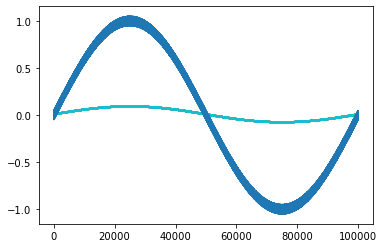

In [194]:
plt.plot(np.squeeze(np.squeeze(y_pred)))
plt.plot(np.squeeze(train_set[1]))